## 1. Data Preparation
Data Loading and Cleaning

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv('World_Happiness_Report.csv')

In [2]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
# Select relevant features for clustering
features = data[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]

# Handle missing values (if any)
features = features.dropna()

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [4]:
scaled_features[:5]  # Display the first 5 rows of scaled data

array([[ 1.36962124,  1.32028142,  1.26340809,  1.57743784,  2.30965159,
         0.47103971],
       [ 1.13522625,  1.51445776,  1.28943383,  1.33245589, -0.01647953,
         1.57585637],
       [ 1.19286069,  1.36105403,  0.99222882,  1.4696591 ,  2.8427738 ,
         0.8242928 ],
       [ 1.52512972,  1.25192192,  1.0351449 ,  1.60513145,  1.8520808 ,
         0.8686375 ],
       [ 1.1948764 ,  1.22120434,  1.11805373,  1.36041579,  1.55572536,
         1.74856316]])

## 2. Model Training
Implementing K-means
แบ่งกลุ่มประเทศตามปัจจัยความสุขเป็น 3 กลุ่ม (n_clusters=3) และเพิ่มคอลัมน์ Cluster ที่แสดงว่าแต่ละประเทศอยู่ในกลุ่มไหน (0, 1 หรือ 2)

In [5]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the original data
data['Cluster'] = kmeans.labels_
data[['Country', 'Cluster']].head()

,Country,Cluster
0,Switzerland,2
1,Iceland,2
2,Denmark,2
3,Norway,2
4,Canada,2


## 3. Optimal Cluster Selection
Elbow Method Implementation
**การวิเคราะห์ Elbow Method**

---

กราฟแสดงให้เห็นว่า k=3 เป็นจุด "elbow" จุดหักศอก ลักษณะสำคัญคือ

- ค่า inertia จาก k=1 ถึง k=3 ลดลงอย่างรวดเร็ว
- หลังจาก k=3 การลดของค่า inertia เริ่มชะลอตัวและมีความชันน้อยลง
- เส้นกราฟเริ่มเรียบและเป็นเส้นตรงมากขึ้นหลังจาก k=3

k=3 จึงเป็นจุดที่เหมาะสมที่สุดในการเลือกจำนวน cluster เพราะให้ความสมดุลระหว่างจำนวน cluster และประสิทธิภาพของการจัดกลุ่ม

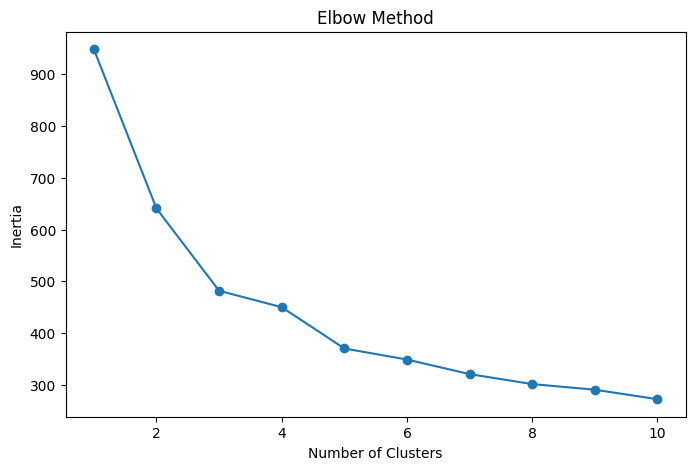

np.float64(0.19102940834735646)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Silhouette Score for k=3
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
silhouette_avg

## 4. Visualization

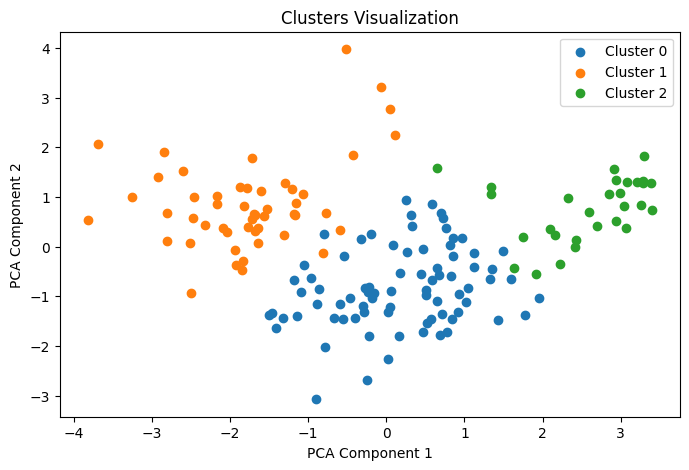

In [14]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plot clusters
plt.figure(figsize=(8, 5))
for cluster in set(data['Cluster']):
    cluster_points = reduced_features[data['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], 
                cluster_points[:, 1], 
                label=f'Cluster {cluster}')

plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


In [ ]:
# Convert specific columns to numeric
columns_to_convert = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
                     'Freedom', 'Trust (Government Corruption)', 'Generosity']
for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

#Filter Numeric Columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
cluster_summary = data.groupby('Cluster')[numeric_columns].mean()


In [20]:
cluster_summary = data.groupby('Cluster').mean(numeric_only=True)[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]
print(cluster_summary)

         Economy (GDP per Capita)    Family  Health (Life Expectancy)  \
Cluster                                                                 
0                        0.980120  1.056143                  0.732992   
1                        0.369585  0.737940                  0.336673   
2                        1.302792  1.250101                  0.856586   

          Freedom  Trust (Government Corruption)  Generosity  
Cluster                                                       
0        0.401858                       0.088927    0.184052  
1        0.366064                       0.132607    0.254268  
2        0.609351                       0.310519    0.353076  
